In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib
plt.style.use(['seaborn'])
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import missingno as mn
from datetime import datetime
from pandas_datareader import data

# 목차
## 01. 시리즈 만들기
## 02. 시리즈 속성
## 03. 시리즈 인덱싱, 슬라이싱
## 04. 시리즈 연산
## 05. 추가, 수정, 삭제, 검색
## 06. 문자열 검색
## 07. 시리즈 통계

## 08. 데이터프레임 만들기
## 09. 데이터프레임 속성
## 10. 데이터프레임 인덱싱, 슬라이싱
## 11. 데이터프레임 연산
## 12. 추가, 수정, 삭제, 검색
## 13. 데이터프레임 통계
## 14. Groupby
## 15. 병합
## 16. 멀티인덱스
## 17. 시계열데이터

## 01. 시리즈 만들기
- https://pandas.pydata.org/docs/reference/api/pandas.Series.html


In [2]:
# 1차원 데이터
myList = [10, 20, 30, 40]
t = (10, 20, 30, 40)
d = {'aa':10, 'bb':20, 'cc':30}
arr = np.array( [11,22,33,44])

In [3]:
# sr = pd.Series( data=myList, index=['aa','bb','cc','dd'], dtype= np.int32)
# sr = pd.Series( data=myList, index=['aa','bb','cc','dd'], dtype= np.float32)
# sr = pd.Series( data=myList, index=['aa','bb','cc','dd'], dtype= np.str_)
sr = pd.Series( data=myList, index=['aa','bb','cc','dd'], dtype= np.int32, name='국어점수')
sr

aa    10
bb    20
cc    30
dd    40
Name: 국어점수, dtype: int32

In [4]:
print(type(sr))

<class 'pandas.core.series.Series'>


In [5]:
sr1 = pd.Series(t, name='국어점수')
sr1

0    10
1    20
2    30
3    40
Name: 국어점수, dtype: int64

In [6]:
sr2 = pd.Series(d, name='국어점수')
sr2

aa    10
bb    20
cc    30
Name: 국어점수, dtype: int64

In [7]:
sr3 = pd.Series(arr, name='국어점수')
sr3

0    11
1    22
2    33
3    44
Name: 국어점수, dtype: int32

## 02. 시리즈 속성

In [8]:
data = {'aa':10,'bb':20,'cc':30,'dd':40, 'ee':50}
sr = pd.Series(data, name='국어점수')
sr

aa    10
bb    20
cc    30
dd    40
ee    50
Name: 국어점수, dtype: int64

In [9]:
print(sr.name)
print(sr.dtype)
print(sr.ndim)
print(sr.shape)
print(sr.size)
print(sr.index)
print(sr.values)
print(sr.values.sum())
# arr = sr.values
# arr.sum() # np.sum(arr)
# print( type( sr.values ))

국어점수
int64
1
(5,)
5
Index(['aa', 'bb', 'cc', 'dd', 'ee'], dtype='object')
[10 20 30 40 50]
150


## 03. 시리즈 인덱싱, 슬라이싱

In [10]:
print(sr)
print('-'*30)
print(sr[0])
print(sr[-1])
print(sr['aa'])
print(sr['ee'])
print(sr[ [0,2,3] ])   # numpy와 달리 Series로
# sr2 = np.array([10,20,30,40,50])
# sr2[[0,2,3]]   # array([10, 30, 40])
print(sr[ ['aa', 'dd', 'ee']])

aa    10
bb    20
cc    30
dd    40
ee    50
Name: 국어점수, dtype: int64
------------------------------
10
50
10
50
aa    10
cc    30
dd    40
Name: 국어점수, dtype: int64
aa    10
dd    40
ee    50
Name: 국어점수, dtype: int64


In [11]:
print(sr)
print('-'*30)
print(sr[1:4])
print(sr[2:])

aa    10
bb    20
cc    30
dd    40
ee    50
Name: 국어점수, dtype: int64
------------------------------
bb    20
cc    30
dd    40
Name: 국어점수, dtype: int64
cc    30
dd    40
ee    50
Name: 국어점수, dtype: int64


In [12]:
# 부여된 인덱스명으로 슬라이싱하면 끝 인덱스 포함
sr['aa':'cc']

aa    10
bb    20
cc    30
Name: 국어점수, dtype: int64

In [13]:
# iloc: zero base indexing, slicing
print(sr.iloc[0])
print(sr.iloc[-1])
print(sr.iloc[2:4])

10
50
cc    30
dd    40
Name: 국어점수, dtype: int64


In [14]:
# loc: 부여된 인덱스로 indexing, slicing
print(sr.loc['aa'])
print(sr.loc['cc':'ee'])
print(sr.loc[['aa','ee']])

10
cc    30
dd    40
ee    50
Name: 국어점수, dtype: int64
aa    10
ee    50
Name: 국어점수, dtype: int64


In [15]:
# iloc, loc 나눠쓰는 이유
sr.index = [2,3,4,5,6]
print(sr)
print(sr[2])   # index가 숫자면 부여된 인덱스로 자동 고정됨
# sr[-1]   => KeyError   => 인덱스 숫자면 iloc, loc 써야 안헤깔려
print(sr.iloc[0])
print(sr.iloc[-1])
print(sr.loc[2])
print(sr.loc[3:5])   # 부여된 인덱스명으로 슬라이싱하면 끝 인덱스 포함

2    10
3    20
4    30
5    40
6    50
Name: 국어점수, dtype: int64
10
10
50
10
3    20
4    30
5    40
Name: 국어점수, dtype: int64


In [16]:
### boolean indexing
sr[[True, True, False, False, True]]

2    10
3    20
6    50
Name: 국어점수, dtype: int64

## 04. 시리즈 연산

In [17]:
data = {'aa':10,'bb':20,'cc':30,'dd':40, 'ee':50}
sr = pd.Series(data, name='국어점수')
sr

aa    10
bb    20
cc    30
dd    40
ee    50
Name: 국어점수, dtype: int64

In [18]:
# 산술관계논리(element wise)
print(sr + 2)
sr * 2

aa    12
bb    22
cc    32
dd    42
ee    52
Name: 국어점수, dtype: int64


aa     20
bb     40
cc     60
dd     80
ee    100
Name: 국어점수, dtype: int64

In [19]:
# 관계연산자
print(sr > 30)
sr[ sr > 30 ]

aa    False
bb    False
cc    False
dd     True
ee     True
Name: 국어점수, dtype: bool


dd    40
ee    50
Name: 국어점수, dtype: int64

In [20]:
# 논리연산자 (and, &, or, |, not, ~)
print(sr[ (sr==20) | (sr==40) ])
print(sr[ (sr >= 20) & (sr <= 40) ])
print(sr[ ~((sr >= 20) & (sr <= 40)) ])

bb    20
dd    40
Name: 국어점수, dtype: int64
bb    20
cc    30
dd    40
Name: 국어점수, dtype: int64
aa    10
ee    50
Name: 국어점수, dtype: int64


In [21]:
# SQL: select * from student where age in (20,30,40)
print((sr==20)|(sr==40)|(sr==50))
print(sr.isin([20,40,50]))
sr[sr.isin([20,40,50])]

aa    False
bb     True
cc    False
dd     True
ee     True
Name: 국어점수, dtype: bool
aa    False
bb     True
cc    False
dd     True
ee     True
Name: 국어점수, dtype: bool


bb    20
dd    40
ee    50
Name: 국어점수, dtype: int64

In [22]:
# SQL: select * from student where age >= 20 and age <= 40
# SQL: select * from student where age between 20 and 40
print((sr>=20)&(sr<=40))
print(sr.between(20, 40))
sr[sr.between(20, 40)]

aa    False
bb     True
cc     True
dd     True
ee    False
Name: 국어점수, dtype: bool
aa    False
bb     True
cc     True
dd     True
ee    False
Name: 국어점수, dtype: bool


bb    20
cc    30
dd    40
Name: 국어점수, dtype: int64

In [23]:
print(sr[~((sr==20)|(sr==40))])
sr[~sr.isin([20,40])]

aa    10
cc    30
ee    50
Name: 국어점수, dtype: int64


aa    10
cc    30
ee    50
Name: 국어점수, dtype: int64

In [24]:
print(sr[sr.index=='aa'])
print(sr.index.isin(['bb','dd']))
print(sr[sr.index.isin(['bb','dd'])])

aa    10
Name: 국어점수, dtype: int64
[False  True False  True False]
bb    20
dd    40
Name: 국어점수, dtype: int64


## 05. 추가, 수정, 삭제, 검색

In [25]:
data = {'aa':10,'bb':20,'cc':30,'dd':40, 'ee':50}
sr = pd.Series(data, name='국어점수')
sr

aa    10
bb    20
cc    30
dd    40
ee    50
Name: 국어점수, dtype: int64

- 수정

In [26]:
# sr[0]  = 100
# sr['aa'] = 200
# sr.iloc[0]= 300
# sr.loc['aa'] = 400
sr

aa    10
bb    20
cc    30
dd    40
ee    50
Name: 국어점수, dtype: int64

In [27]:
# sr[1:4] = 11
# sr[1:4] = [1,2,3]
# sr['bb':'dd'] = [4,5,6]
# sr.iloc[1:4] = [7,8,9]
# sr.loc['bb':'cc'] = [1,2]
sr

aa    10
bb    20
cc    30
dd    40
ee    50
Name: 국어점수, dtype: int64

In [28]:
# 30이상인데이터에 5를 더한 값으로 수정하시요.
# sr[sr>=30] = sr[sr>=30] + 5
sr[sr>=30] += 5 
sr

aa    10
bb    20
cc    35
dd    45
ee    55
Name: 국어점수, dtype: int64

- 추가

In [29]:
sr.loc['ff'] = 100   # 해당 인덱스 있으면 수정, 없으면 끝에 추가
sr

aa     10
bb     20
cc     35
dd     45
ee     55
ff    100
Name: 국어점수, dtype: int64

- 삭제

In [30]:
# drop(부여된 인덱스)
# sr.drop(['aa','dd'])   # sr은 그대로
# sr
# sr.drop(['aa','dd'], inplace=True)   # sr 변경
# sr

In [31]:
# 30 이상인 데이터를 삭제하시오.
sr.drop(sr[sr>=30].index)
# sr.drop(sr.index[sr>=30])

aa    10
bb    20
Name: 국어점수, dtype: int64

- 정렬

In [32]:
sr['aa'] = 100
sr

aa    100
bb     20
cc     35
dd     45
ee     55
ff    100
Name: 국어점수, dtype: int64

In [33]:
sr.sort_values()
sr.sort_values(ascending=False)
sr.sort_index()
sr.sort_index(ascending=False)

ff    100
ee     55
dd     45
cc     35
bb     20
aa    100
Name: 국어점수, dtype: int64

## 06. 문자열 검색

In [34]:
sr = pd.Series(['홍길동','이순신','김철수','김순이',
               '이홍김'] )
sr.index=['aa','bb','cc','dd','ee']
sr

aa    홍길동
bb    이순신
cc    김철수
dd    김순이
ee    이홍김
dtype: object

In [35]:
# 데이터가 문자열인 경우 str속성을 이용
# https://pandas.pydata.org/pandas-docs/version/0.15.2/api.html
print(type(sr.str))
print(sr.str[1:])
print(sr.str.contains('홍'))
print(sr[ sr.str.contains('홍') ])
print(sr.index.str.contains('a'))
print(sr[ sr.index.str.contains('a') ])

<class 'pandas.core.strings.accessor.StringMethods'>
aa    길동
bb    순신
cc    철수
dd    순이
ee    홍김
dtype: object
aa     True
bb    False
cc    False
dd    False
ee     True
dtype: bool
aa    홍길동
ee    이홍김
dtype: object
[ True False False False False]
aa    홍길동
dtype: object


In [36]:
# 정규 표현식 메타기호: . ^ $ * + ? { } [ ] \ | ( )
# https://wikidocs.net/4308
sr[ sr.str.contains('^김')]   # 시작 메타기호
sr[ sr.str.contains('김$')]   # 종료 메타기호
sr[ sr.str.contains('[홍이]')]   # 문자의 집합
sr[ sr.str.contains('[홍이]순')] 
sr[ sr.str.contains('길동|순이|이홍')]

aa    홍길동
dd    김순이
ee    이홍김
dtype: object

In [37]:
sr.str.replace('^김','황', regex=True)
sr.str.replace('김[철이]', '황', regex=True)
sr.str.extract('(^김)')   # () 필수
sr

aa    홍길동
bb    이순신
cc    김철수
dd    김순이
ee    이홍김
dtype: object

In [38]:
sr.str.extract('(^김)([가-힣]+)')
sr.str.extract('([가-힝])([가-힣]+)')
sr.str.extract('([가-힝]{2})([가-힣]+)')

,0,1
aa,홍길,동
bb,이순,신
cc,김철,수
dd,김순,이
ee,이홍,김


## 07. 시리즈 통계

In [39]:
data = {'aa':10,'bb':20,'cc':30,'dd':40,'ee':50}
sr = pd.Series(data, name='국어점수')
sr

aa    10
bb    20
cc    30
dd    40
ee    50
Name: 국어점수, dtype: int64

In [40]:
sr.sum()
sr.min()
sr.max()
sr.idxmax()
sr.idxmin()
sr.mean()

30.0

In [41]:
# 45이하인 데이터의 가장 큰 값을 구하시오.
sr[sr<=45].max()

40

In [42]:
sr['cc'] = 40
sr.nlargest()   # defalut: n = 5
sr.nlargest(2)
sr.nlargest(n=2, keep='last')
sr.nlargest(n=2, keep='all')

ee    50
cc    40
dd    40
Name: 국어점수, dtype: int64

In [43]:
sr.nsmallest()   # defalut: n = 5
sr.head(2)   # defalut: n = 5
sr.tail(n=2)

dd    40
ee    50
Name: 국어점수, dtype: int64

In [44]:
sr.var()
sr.std()
sr.median()
sr.quantile(q=[0.25, 0.5, 0.75])
sr.unique()
sr.value_counts()

40    2
10    1
20    1
50    1
Name: 국어점수, dtype: int64

In [45]:
def fn(v) : 
    print('='*20)
    print(v)
    print('='*20)
    return v+2

# sr.map
sr.apply(fn)

10
20
40
40
50


aa    12
bb    22
cc    42
dd    42
ee    52
Name: 국어점수, dtype: int64

In [46]:
def fn2(v):
    if v <= 30:
        return v+2
    else:
        return v+1

sr.apply(fn2)

aa    12
bb    22
cc    41
dd    41
ee    51
Name: 국어점수, dtype: int64

In [47]:
def fn3(v):
    return v+3 if v<=30 else v+2

sr.apply(fn3)

aa    13
bb    23
cc    42
dd    42
ee    52
Name: 국어점수, dtype: int64

In [48]:
sr.apply(lambda v: v+3 if v<=30 else v+2)   # lambda: 임시 함수 => 메모리 측면에서 좋음

aa    13
bb    23
cc    42
dd    42
ee    52
Name: 국어점수, dtype: int64

In [49]:
pd.cut(sr, bins=5)   # 5개의 계급으로 나누기 / dtype: category / 10포함을 위해 aa (9.96, 
pd.cut(sr, bins=[0, 20, 40, 60])   # 입력 sequence에 따라 분류 / 최저값 < 범위 <= 최대값
pd.cut(sr, bins=[0, 20, 40, 60], labels=['C','B','A'])
pd.cut(sr, bins=[0, 20, 40, 60], labels=['C','B','A']).value_counts()

C    2
B    2
A    1
Name: 국어점수, dtype: int64

In [50]:
pd.cut(sr, bins=[0, 20, 40, 60], labels=['C','B','A'])

aa    C
bb    C
cc    B
dd    B
ee    A
Name: 국어점수, dtype: category
Categories (3, object): ['C' < 'B' < 'A']

In [51]:
# sr.to_csv('a.csv')

In [52]:
# for n in sr:
#     print(n)

# for n in sr.index:
#     print(n)

for n in sr.items():
    print(n)

('aa', 10)
('bb', 20)
('cc', 40)
('dd', 40)
('ee', 50)


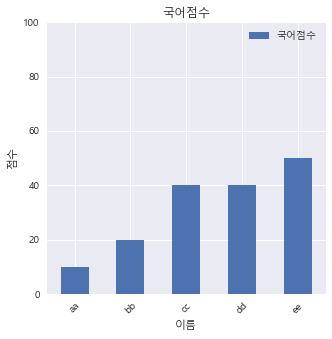

In [53]:
# 시각화
sr.plot(kind='bar', figsize=(5, 5), title='국어점수', grid=True,
        legend=True, ylim=(0,100), xlabel='이름', ylabel='점수',
        rot=45)
plt.show()

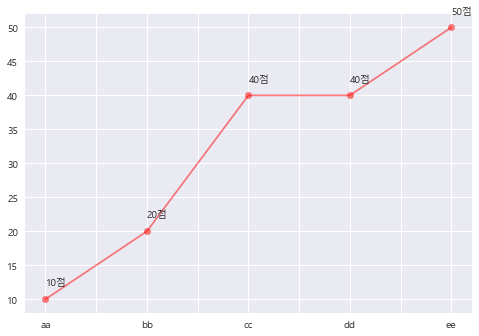

In [54]:
sr.plot(style='r-o', alpha=0.5)
for i in range(sr.size):
    plt.text(i, sr.iloc[i]+2, f'{sr.iloc[i]}점')
plt.show()

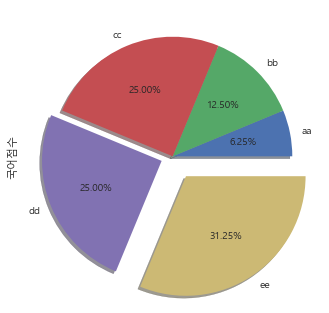

In [55]:
sr.plot(kind='pie', autopct='%.2f%%', shadow=True, explode=[0, 0, 0, 0.1, 0.2])
plt.show()

## 08. 데이터프레임 만들기

In [56]:
d1 = [[1,2],[3,4],[5,6]]
d2 = [(1,2),(3,4),(5,6)]
d3 = [{'kor':1, 'eng':2},
      {'kor':3, 'eng':4},
      {'kor':5, 'eng':6}]
d4 ={'kor':[1,3,5],'eng':[2,4,6]}
# d5 = [시리즈, 시리즈, 시리즈]

In [57]:
df1 = pd.DataFrame(data=d1)
df1 = pd.DataFrame(data=d1, index=['aa','bb','cc'])
df1 = pd.DataFrame(data=d1, index=['aa','bb','cc'], columns=['eng','kor'])
df1

,eng,kor
aa,1,2
bb,3,4
cc,5,6


In [58]:
df2 = pd.DataFrame(data=d2)
df2

,0,1
0,1,2
1,3,4
2,5,6


In [59]:
df3 = pd.DataFrame(data=d3)
df3

,kor,eng
0,1,2
1,3,4
2,5,6


In [60]:
df4 = pd.DataFrame(data=d4)
df4

,kor,eng
0,1,2
1,3,4
2,5,6


## 09. 데이터프레임 속성

In [61]:
data =  {'eng':[10,30,50,70],
         'kor':[20,40,60,80],
         'math':[90,50,20,70]}
df = pd.DataFrame(data, index=['a','b','c','d'] )
df

,eng,kor,math
a,10,20,90
b,30,40,50
c,50,60,20
d,70,80,70


In [62]:
print('df.ndim: ', df.ndim)
print('df.shape: ', df.shape)
print('df.shape[0]: ', df.shape[0])   # 행의 개수
print('len(df): ', len(df))
print('df.size: ', df.size)
print('df.T: ', '\n', df.T)
print('df.index: ', df.index)
print('df.columns: ', df.columns)
print('df.dtypes: ', '\n', df.dtypes)   # 시리즈 객체
print('df.dtypes["eng"]: ', df.dtypes['eng'])   # 시리즈 객체

df.ndim:  2
df.shape:  (4, 3)
df.shape[0]:  4
len(df):  4
df.size:  12
df.T:  
        a   b   c   d
eng   10  30  50  70
kor   20  40  60  80
math  90  50  20  70
df.index:  Index(['a', 'b', 'c', 'd'], dtype='object')
df.columns:  Index(['eng', 'kor', 'math'], dtype='object')
df.dtypes:  
 eng     int64
kor     int64
math    int64
dtype: object
df.dtypes["eng"]:  int64


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   eng     4 non-null      int64
 1   kor     4 non-null      int64
 2   math    4 non-null      int64
dtypes: int64(3)
memory usage: 300.0+ bytes


## 10. 데이터프레임 인덱싱, 슬라이싱

In [64]:
# 인덱싱: df['컬럼명']
# NumPy: structured array
print(df)
print(df['eng'])   # 시리즈
print(type(df['eng']))   # <class 'pandas.core.series.Series'>
print(df[['eng']])   # 데이터프레임
print(type(df[['eng']]))   # <class 'pandas.core.frame.DataFrame'>
print(df['eng'].sum())   # 시리즈 객체의 속성 메소드

   eng  kor  math
a   10   20    90
b   30   40    50
c   50   60    20
d   70   80    70
a    10
b    30
c    50
d    70
Name: eng, dtype: int64
<class 'pandas.core.series.Series'>
   eng
a   10
b   30
c   50
d   70
<class 'pandas.core.frame.DataFrame'>
160


In [65]:
print(df[['eng','math']])   # 데이터프레임 / NumPy 불편, 그러나 인공지능에서 많이 쓰임 / 둘다 잘 기억해 ㅎㅎ
print(df['eng']['a':'c'])

# df.eng   # 권장 사항 X
# df.eng['a':'c']

   eng  math
a   10    90
b   30    50
c   50    20
d   70    70
a    10
b    30
c    50
Name: eng, dtype: int64


In [66]:
# 슬라이싱: 익덱스(행, row단위)
print(df)
print(df[1:3])
print(df['b':'c'])

   eng  kor  math
a   10   20    90
b   30   40    50
c   50   60    20
d   70   80    70
   eng  kor  math
b   30   40    50
c   50   60    20
   eng  kor  math
b   30   40    50
c   50   60    20


In [67]:
df_prac = pd.DataFrame([[1,2],[3,4]])
print(df_prac)

a, b = df_prac.values
print(a)
print(b)

   0  1
0  1  2
1  3  4
[1 2]
[3 4]


In [68]:
# iloc 속성 (zero-base): iloc[행, 열]
print(df)
print(df.iloc[0])   # 0행 => <class 'pandas.core.series.Series'>
print(df.iloc[0,0])   # 10 => <class 'numpy.int64'>
print(df.iloc[0]['eng'])   # 10
print(df.iloc[1:4])   # =><class 'pandas.core.frame.DataFrame'>
print(df.iloc[[0,2,3]])   # =><class 'pandas.core.frame.DataFrame'>

   eng  kor  math
a   10   20    90
b   30   40    50
c   50   60    20
d   70   80    70
eng     10
kor     20
math    90
Name: a, dtype: int64
10
10
   eng  kor  math
b   30   40    50
c   50   60    20
d   70   80    70
   eng  kor  math
a   10   20    90
c   50   60    20
d   70   80    70


In [69]:
print(df.iloc[1:, 1])
print(df.iloc[1:, 1:])
print(df.iloc[[0,1,3],[0,2]])
print(df.iloc[:,:-1])   # 마지막 칼럼 제외하고 선택

b    40
c    60
d    80
Name: kor, dtype: int64
   kor  math
b   40    50
c   60    20
d   80    70
   eng  math
a   10    90
b   30    50
d   70    70
   eng  kor
a   10   20
b   30   40
c   50   60
d   70   80


In [70]:
# loc 속성 (부여된 인덱스명, 컬렴명): loc[행, ]
print(df)
print(df.loc['a'])
print(df.loc['a','eng'])
print(df.loc['a':'c'])
print(df.loc['a':'c','kor':])
print(df.loc[['a','b','d'],['eng','math']])

   eng  kor  math
a   10   20    90
b   30   40    50
c   50   60    20
d   70   80    70
eng     10
kor     20
math    90
Name: a, dtype: int64
10
   eng  kor  math
a   10   20    90
b   30   40    50
c   50   60    20
   kor  math
a   20    90
b   40    50
c   60    20
   eng  math
a   10    90
b   30    50
d   70    70


## 11. 데이터프레임 연산

In [71]:
data =  {'eng':[2,4,6,8],
         'kor':[3,9,12,15],
         'math':[4,8,12,16]}
df = pd.DataFrame(data, index=['a','b','c','d'] )
df

,eng,kor,math
a,2,3,4
b,4,9,8
c,6,12,12
d,8,15,16


In [72]:
# 요소별 연산(element wise)
print(df + 2)
print(df - 2)
print(df * 2)
print(df / 2)

   eng  kor  math
a    4    5     6
b    6   11    10
c    8   14    14
d   10   17    18
   eng  kor  math
a    0    1     2
b    2    7     6
c    4   10    10
d    6   13    14
   eng  kor  math
a    4    6     8
b    8   18    16
c   12   24    24
d   16   30    32
   eng  kor  math
a  1.0  1.5   2.0
b  2.0  4.5   4.0
c  3.0  6.0   6.0
d  4.0  7.5   8.0


In [73]:
df['eng'] + 2
df['eng'] = 11   # 수정 => df 변경
df['eng'] = [10,30,50,70] 
print(df)

   eng  kor  math
a   10    3     4
b   30    9     8
c   50   12    12
d   70   15    16


In [74]:
print(df)
df.loc['a'] = df.loc['a'] + 2
print(df)

# df.loc['b':'c','kor':] = df.loc['b':'c','kor':] + 2
# df.loc['b':'c','kor':'math'] = [[1,2],[3,4]]

   eng  kor  math
a   10    3     4
b   30    9     8
c   50   12    12
d   70   15    16
   eng  kor  math
a   12    5     6
b   30    9     8
c   50   12    12
d   70   15    16


In [75]:
# boolean 인덱싱
print(df)
print(df[[True,False,True,True]])   # NumPy처럼 행 단위

   eng  kor  math
a   12    5     6
b   30    9     8
c   50   12    12
d   70   15    16
   eng  kor  math
a   12    5     6
c   50   12    12
d   70   15    16


In [76]:
# 관계 연산자 : row X , column O
df[ df['kor'] > 40 ]

,eng,kor,math


In [77]:
# 논리 연산자 (&, |, ~)
df[ (df['eng'] == 30) | (df['eng'] == 70) ]
# df[ df['eng'].isin([30, 70]) ]
df[ (df['eng'] >= 20) & (df['eng'] <= 50) ]
# df[ df['eng'].between(20, 50) ]

,eng,kor,math
b,30,9,8
c,50,12,12


In [78]:
# query 함수
# SQL: select * from grade where eng>40;    
df[ df['kor']>40 ]
df.query('eng>40')

,eng,kor,math
c,50,12,12
d,70,15,16


In [79]:
n=40
df[df[ 'kor']>n ]
df.query( f'eng>{n}' )

,eng,kor,math
c,50,12,12
d,70,15,16


In [80]:
# SQL: select * from grade where eng=40 or eng=70
df[ (df['eng'] == 30) | (df['eng'] == 70) ]
df.query( 'eng==30 or eng==70' )

# SQL: select * from grade where eng>=40 and eng<=70
df[ (df['eng'] >= 20) & (df['eng'] <= 50) ]
df.query( 'eng>=40 and eng<=70')
df.query( '40<=eng<=70')

,eng,kor,math
c,50,12,12
d,70,15,16


## 12. 추가, 수정, 삭제, 검색

In [81]:
df

,eng,kor,math
a,12,5,6
b,30,9,8
c,50,12,12
d,70,15,16


In [82]:
# 추가
# df.loc['e'] = [1,2,3]   # 있으면 수정 없으면 추가
# df
# df['test'] = [1,2,3,4,5]   # 있으면 수정 없으면 추가
# df
df['sum'] = df['eng'] + df['kor']
df

,eng,kor,math,sum
a,12,5,6,17
b,30,9,8,39
c,50,12,12,62
d,70,15,16,85


In [83]:
# 삭제
# df.drop( index=['a','d','e'] )
# df.drop( columns=['test','sum'])
# df.drop( index=['a','e'], columns=['test', 'sum'])

In [84]:
df = pd.DataFrame( data , index=['a','b','c','d'])
df

df.columns   # Index Class
type(df.columns)
df.columns.difference( ['kor'] )   # 해당 칼럼 제외한 칼럼 인덱스
# df[['eng', 'math']].columns

df.index   # Index Class
# type(df.index)
# df.index.difference( ['a'])

Index(['a', 'b', 'c', 'd'], dtype='object')

### 결측데이터 처리 (삭제, 특정값(대표값)으로 채운다)

In [85]:
df.loc['b','kor'] = np.nan
df.loc['b':'c','math'] = np.nan
df

,eng,kor,math
a,2,3.0,4.0
b,4,NaN,NaN
c,6,12.0,NaN
d,8,15.0,16.0


In [86]:
# 결측데이터 확인
df.isna()   # Nan => True
df.isna().sum()   # defalut: column 값

eng     0
kor     1
math    2
dtype: int64

<AxesSubplot:>

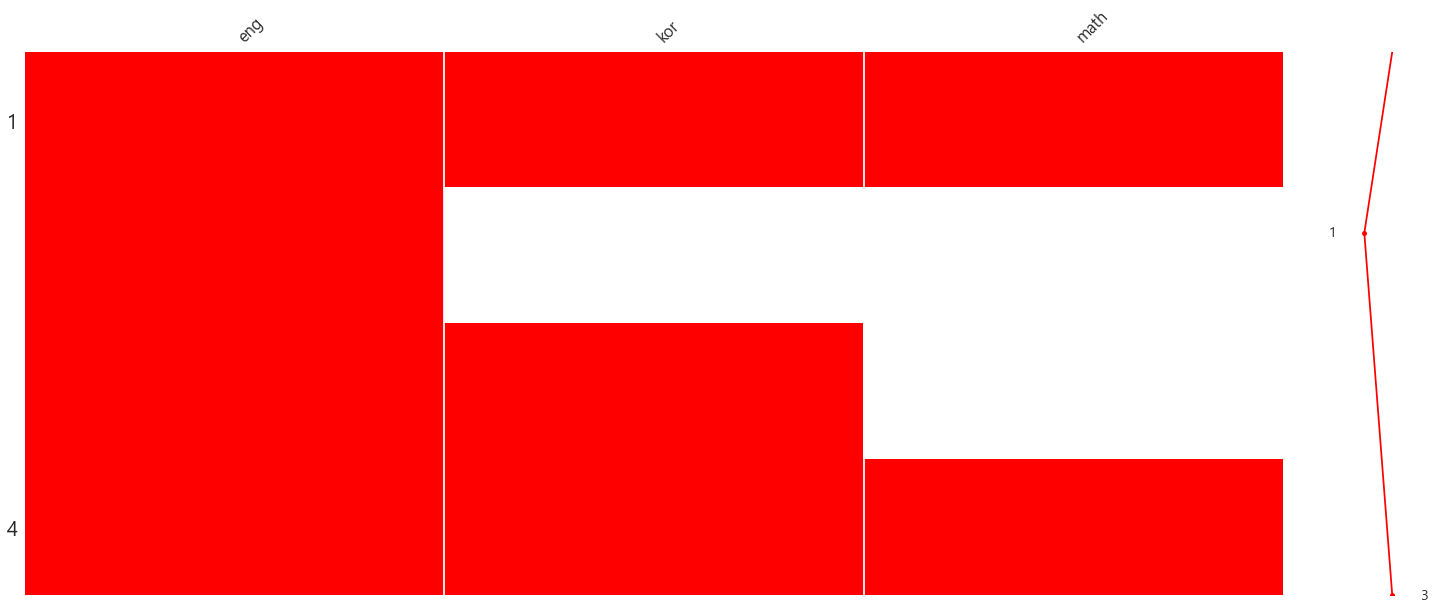

In [87]:
import missingno as mn
mn.matrix(df, color=(1,0,0))

In [88]:
# NaN 값 채우기
df.fillna(11)

,eng,kor,math
a,2,3.0,4.0
b,4,11.0,11.0
c,6,12.0,11.0
d,8,15.0,16.0


In [89]:
df['kor'].fillna(11)
# df['kor'] = df['kor'].fillna(11)
# df['kor'].fillna(11, inplace=True)

a     3.0
b    11.0
c    12.0
d    15.0
Name: kor, dtype: float64

In [90]:
# NaN 삭제
df.dropna()   # NaN이 있는 행 삭제
df
df.dropna(axis=1)   # NaN이 있는 컬럼 삭제
df

,eng,kor,math
a,2,3.0,4.0
b,4,NaN,NaN
c,6,12.0,NaN
d,8,15.0,16.0


In [91]:
df.dropna(subset=['kor'])   # subset에 적힌 column값에 대해서만
# df['kor'].dropna(inplace=True)
# df

,eng,kor,math
a,2,3.0,4.0
c,6,12.0,NaN
d,8,15.0,16.0


In [92]:
# 정렬
df.sort_values(by='eng')   # defalut: True / 오름차순
df.sort_values(by='eng', ascending=False)   # 내림차순

,eng,kor,math
d,8,15.0,16.0
c,6,12.0,NaN
b,4,NaN,NaN
a,2,3.0,4.0


In [93]:
df.loc['c','kor'] = 40
df.sort_values(by=['kor','math'])
df.sort_index()

,eng,kor,math
a,2,3.0,4.0
b,4,NaN,NaN
c,6,40.0,NaN
d,8,15.0,16.0


## 13. 데이터프레임 통계

In [94]:
df.sum()   # defalut: 컬럼별
df.sum(axis=1)   # row별
df.sum().sum()   # 전체합
df.values.sum()   # 전체합

nan

In [95]:
df.mean()
df.mean(axis=1)
df.max()
df.max(axis=1)
df.max().max()   # 전체 최대값

40.0

In [96]:
# unstack: df -> series로 변환 
sr = df.unstack()
sr
sr.index
sr.values
df
df.unstack().max()   # df.max().max()   # df.values.max()  

40.0

In [97]:
df.median()
df.median(axis=1)
# df.unstack().median()   # 45.0   # 전체 중간값
# np.median(df.values)   # 45.0   # 전체 중간값
# df.median().median()   # 40.0   # 전체 중간값 X
df.min()
df.idxmax()
df.idxmax(axis=1)
df.std()
df['eng'].quantile(q=[0.25,0.5,0.75])
# df.count()

0.25    3.5
0.50    5.0
0.75    6.5
Name: eng, dtype: float64

In [98]:
# 상관관계
df.corr()  
# r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
# r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
# r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
# r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
# r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
# r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
# r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계

# np.corrcoef(df['eng'].values, df['math'].values)

,eng,kor,math
eng,1.000000,0.491305,1.0
kor,0.491305,1.000000,1.0
math,1.000000,1.000000,1.0


In [99]:
df.describe()

,eng,kor,math
count,4.000000,3.000000,2.000000
mean,5.000000,19.333333,10.000000
std,2.581989,18.876794,8.485281
min,2.000000,3.000000,4.000000
25%,3.500000,9.000000,7.000000
50%,5.000000,15.000000,10.000000
75%,6.500000,27.500000,13.000000
max,8.000000,40.000000,16.000000


In [100]:
def fn( v ):
    print('================')
    print( v )
    print('================')
    return v.sum()
df.apply(fn)
df.apply(fn, axis=1)

a    2
b    4
c    6
d    8
Name: eng, dtype: int64
a     3.0
b     NaN
c    40.0
d    15.0
Name: kor, dtype: float64
a     4.0
b     NaN
c     NaN
d    16.0
Name: math, dtype: float64
eng     2.0
kor     3.0
math    4.0
Name: a, dtype: float64
eng     4.0
kor     NaN
math    NaN
Name: b, dtype: float64
eng      6.0
kor     40.0
math     NaN
Name: c, dtype: float64
eng      8.0
kor     15.0
math    16.0
Name: d, dtype: float64


a     9.0
b     4.0
c    46.0
d    39.0
dtype: float64

In [101]:
#  국어,영어,수학 점수의 평균이 70점 이상이면 '합격' 아니면 '불합격' 인 시리즈를 구하시요
df
# df.apply(lambda v: '합격' if v.mean()>=70 else '불합격', axis=1)
# df.mean(axis = 1).apply(lambda v: '합격' if v>= 70 else '불합격')

,eng,kor,math
a,2,3.0,4.0
b,4,NaN,NaN
c,6,40.0,NaN
d,8,15.0,16.0


In [102]:
df.nlargest(n=2, columns='eng')

,eng,kor,math
d,8,15.0,16.0
c,6,40.0,NaN


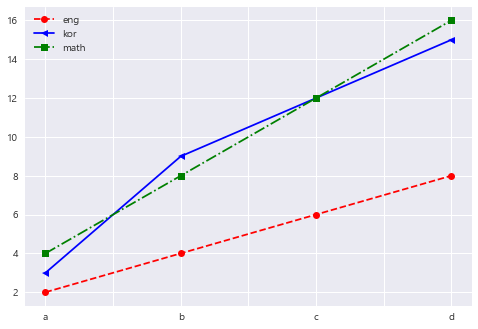

In [103]:
df = pd.DataFrame(data, index=['a','b','c','d'] )
df.plot(style=['ro--','b<-','gs-.' ])
plt.show()

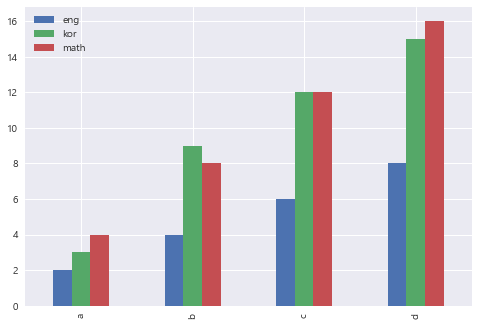

In [104]:
df.plot(kind='bar')
plt.show()

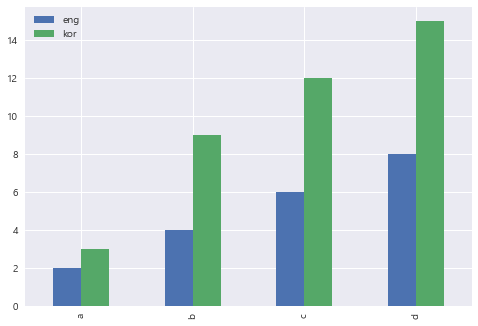

In [105]:
df.plot(y=['eng','kor'], kind='bar')
plt.show()

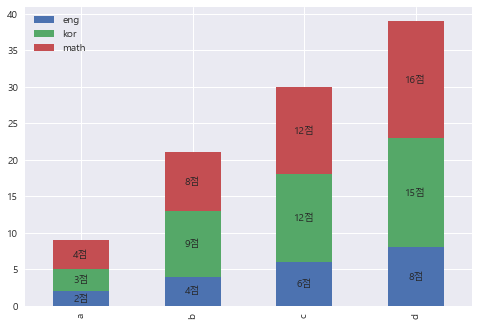

In [106]:
# 1
df.plot(kind='bar', stacked=True)

idx = 0
for i, sr in df.iterrows():
    e, k, m = sr['eng'], sr['kor'], sr['math']
    plt.text(idx, e/2, f'{e}점', va='center', ha='center')
    plt.text(idx, k/2+e, f'{k}점', va='center', ha='center')
    plt.text(idx, m/2+e+k, f'{m}점', va='center', ha='center')
    idx += 1

plt.show()

# 2
# df.plot(kind='bar', stacked=True)

# for i in range(len(df)):
#     plt.text(i, df.iloc[i][0]/2, f'{df.iloc[i][0]}점', va='center', ha='center')
#     plt.text(i, df.iloc[i][1]/2 + df.iloc[i][0], f'{df.iloc[i][1]}점', va='center', ha='center')
#     plt.text(i, df.iloc[i][2]/2 + df.iloc[i][0] + df.iloc[i][1], f'{df.iloc[i][2]}점', va='center', ha='center')    

# plt.show()

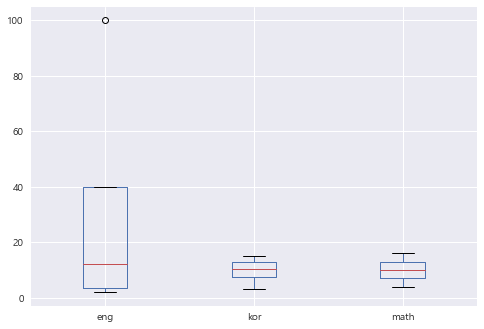

In [107]:
df.loc['d','eng'] = 100
df.loc['c','eng'] = 20
df.plot(kind='box')
plt.show()

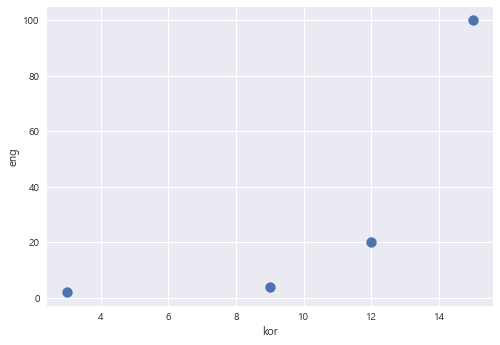

In [108]:
df.plot(kind='scatter', x='kor', y='eng', s=100)
plt.show()

In [109]:
for n in df:   #df.columns
    print(n)
    
for n in df.index:
    print(n)

eng
kor
math
a
b
c
d


In [110]:
for n in df.items():
    print(n)
  
print('='*50)

for c, sr in df.items():
    print(c)
    print(sr)
    print('='*20)

print('='*50)
    
for c, sr in df.items():
    print(c)
    print( sr['a'],sr['b'],sr['c'],sr['d']  ) 

('eng', a      2
b      4
c     20
d    100
Name: eng, dtype: int64)
('kor', a     3
b     9
c    12
d    15
Name: kor, dtype: int64)
('math', a     4
b     8
c    12
d    16
Name: math, dtype: int64)
eng
a      2
b      4
c     20
d    100
Name: eng, dtype: int64
kor
a     3
b     9
c    12
d    15
Name: kor, dtype: int64
math
a     4
b     8
c    12
d    16
Name: math, dtype: int64
eng
2 4 20 100
kor
3 9 12 15
math
4 8 12 16


In [111]:
for i, sr in df.iterrows():
    print(i)
    print(sr['eng'], sr['kor'], sr['math'])
    print('='*20)

a
2 3 4
b
4 9 8
c
20 12 12
d
100 15 16


## 14. Groupby

In [112]:
df = pd.read_csv('../data/grade.csv')
df

,학년,과목,결과,중간,기말
0,1학년,국어,좋음,80,90
1,1학년,국어,나쁨,50,40
2,1학년,국어,나쁨,20,50
3,1학년,수학,좋음,83,95
4,1학년,수학,좋음,93,86
5,2학년,국어,나쁨,44,65
6,2학년,국어,좋음,95,98
7,2학년,수학,좋음,96,99
8,2학년,수학,나쁨,57,69


In [113]:
df[['중간','기말']].sum()

중간    618
기말    692
dtype: int64

In [114]:
g = df.groupby('학년')
g   # <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001D021A0E7C0>
g.mean()   # 숫자만
g.max()   # 문자도
g.min()   # 문자도
g.count()
g.agg(['sum','mean'])

중간         기말       
     sum  mean  sum   mean
학년                        
1학년  326  65.2  361  72.20
2학년  292  73.0  331  82.75

In [115]:
g = df.groupby(['학년','과목'])
g.mean()

중간    기말
학년  과목            
1학년 국어  50.0  60.0
    수학  88.0  90.5
2학년 국어  69.5  81.5
    수학  76.5  84.0

- pivot_table, pd.pivot

In [116]:
df
# df.pivot_table( index='학년' )   # defalut: aggfunc='mean'
# df.pivot_table( index='학년' ,aggfunc='sum')
# df.pivot_table( index=['학년','과목'] )
# df.pivot_table( index=['학년','과목'] , values='중간')
# df.pivot_table( index=['학년','과목'] , values=['중간','기말'] )
# df.pivot_table( index=['학년','과목'] , values='중간', columns='결과')

,학년,과목,결과,중간,기말
0,1학년,국어,좋음,80,90
1,1학년,국어,나쁨,50,40
2,1학년,국어,나쁨,20,50
3,1학년,수학,좋음,83,95
4,1학년,수학,좋음,93,86
5,2학년,국어,나쁨,44,65
6,2학년,국어,좋음,95,98
7,2학년,수학,좋음,96,99
8,2학년,수학,나쁨,57,69


In [117]:
# 학년별로 중간고사평균이 70점이상이면 '합격', 아니면 '불합격'으로 표시하시요

In [118]:
df.pivot_table(index='학년', aggfunc=lambda v:'합격' if v.mean()>=70 else '불합격',
              values=['중간','기말'])[['중간','기말']]

,중간,기말
학년,,
1학년,불합격,합격
2학년,합격,합격


## 15. 병합

In [119]:
employee = [{'empno':1, 'ename':'kim', 'dept':1},
            {'empno':2, 'ename':'lee', 'dept':2},
            {'empno':3, 'ename':'park', 'dept':1},
            {'empno':4, 'ename':'song', 'dept':3},
            {'empno':5, 'ename':'min', 'dept':2}
           ]

dept=[{'dept':1, 'deptname':'관리직'},
      {'dept':2, 'deptname':'영업직'},
      {'dept':3, 'deptname':'개발직'}
     ]

info =[{'empno':1, 'addr':'서울시','phone':'010-1111-1111'},
       {'empno':3, 'addr':'부산시','phone':'010-2222-2222'},
       {'empno':2, 'addr':'광주시','phone':'010-3333-3333'},
       {'empno':5, 'addr':'광주시','phone':'010-4444-4444'},
       {'empno':4, 'addr':'광주시','phone':'010-5555-5555'}
      ]

In [120]:
emp = pd.DataFrame(employee)
dept = pd.DataFrame(dept)
info = pd.DataFrame(info)

In [121]:
emp

,empno,ename,dept
0,1,kim,1
1,2,lee,2
2,3,park,1
3,4,song,3
4,5,min,2


In [122]:
dept

,dept,deptname
0,1,관리직
1,2,영업직
2,3,개발직


In [123]:
info

,empno,addr,phone
0,1,서울시,010-1111-1111
1,3,부산시,010-2222-2222
2,2,광주시,010-3333-3333
3,5,광주시,010-4444-4444
4,4,광주시,010-5555-5555


In [124]:
# merge(병합) 반드시 공통 컬럼이 있어야 함
mdf = pd.merge(emp, dept, on='dept')
mdf

,empno,ename,dept,deptname
0,1,kim,1,관리직
1,3,park,1,관리직
2,2,lee,2,영업직
3,5,min,2,영업직
4,4,song,3,개발직


In [125]:
mdf.drop(columns='dept', inplace=True)
mdf

,empno,ename,deptname
0,1,kim,관리직
1,3,park,관리직
2,2,lee,영업직
3,5,min,영업직
4,4,song,개발직


In [126]:
resultDF = pd.merge(mdf, info, on='empno')
resultDF

,empno,ename,deptname,addr,phone
0,1,kim,관리직,서울시,010-1111-1111
1,3,park,관리직,부산시,010-2222-2222
2,2,lee,영업직,광주시,010-3333-3333
3,5,min,영업직,광주시,010-4444-4444
4,4,song,개발직,광주시,010-5555-5555


In [127]:
resultDF.drop(columns=['empno'], inplace=True)
resultDF

,ename,deptname,addr,phone
0,kim,관리직,서울시,010-1111-1111
1,park,관리직,부산시,010-2222-2222
2,lee,영업직,광주시,010-3333-3333
3,min,영업직,광주시,010-4444-4444
4,song,개발직,광주시,010-5555-5555


In [128]:
# concat 결합: 공통 컬럼 없어도 가능
pd.concat([emp,dept])

,empno,ename,dept,deptname
0,1.0,kim,1,NaN
1,2.0,lee,2,NaN
2,3.0,park,1,NaN
3,4.0,song,3,NaN
4,5.0,min,2,NaN
0,NaN,NaN,1,관리직
1,NaN,NaN,2,영업직
2,NaN,NaN,3,개발직


In [129]:
pd.concat([emp,dept], axis=1)

,empno,ename,dept,dept,deptname
0,1,kim,1,1.0,관리직
1,2,lee,2,2.0,영업직
2,3,park,1,3.0,개발직
3,4,song,3,NaN,NaN
4,5,min,2,NaN,NaN


## 16. 멀티인덱스

In [130]:
np.random.seed(1)
data = np.random.randint(30, 101, size=(4,6))
data

array([[67, 42, 39, 35, 94, 46],
       [31, 36, 55, 80, 50, 48],
       [41, 58, 59, 44, 80, 98],
       [43, 39, 37, 93, 91, 52]])

In [131]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5
0,67,42,39,35,94,46
1,31,36,55,80,50,48
2,41,58,59,44,80,98
3,43,39,37,93,91,52


In [132]:
df['년도'] = [2020,2020,2021,2021]
df['학년'] = ['1학년','2학년','1학년','2학년']
df

,0,1,2,3,4,5,년도,학년
0,67,42,39,35,94,46,2020,1학년
1,31,36,55,80,50,48,2020,2학년
2,41,58,59,44,80,98,2021,1학년
3,43,39,37,93,91,52,2021,2학년


In [133]:
df.set_index(['년도','학년'])

0   1   2   3   4   5
년도   학년                         
2020 1학년  67  42  39  35  94  46
     2학년  31  36  55  80  50  48
2021 1학년  41  58  59  44  80  98
     2학년  43  39  37  93  91  52

In [134]:
df.index = pd.MultiIndex.from_product([[2020,2021],['1학년','2학년']],
                                      names=['년도','학년'])

print(type(df.index))
df.index

<class 'pandas.core.indexes.multi.MultiIndex'>


MultiIndex([(2020, '1학년'),
            (2020, '2학년'),
            (2021, '1학년'),
            (2021, '2학년')],
           names=['년도', '학년'])

In [135]:
# 정렬되어 출력
print(df.index.levels)
print(df.index.levels[0])
print(df.index.levels[1])

[[2020, 2021], ['1학년', '2학년']]
Int64Index([2020, 2021], dtype='int64', name='년도')
Index(['1학년', '2학년'], dtype='object', name='학년')


In [136]:
print(df.index.get_level_values(0))
print(df.index.get_level_values('년도'))
print(df.index.get_level_values('학년'))

Int64Index([2020, 2020, 2021, 2021], dtype='int64', name='년도')
Int64Index([2020, 2020, 2021, 2021], dtype='int64', name='년도')
Index(['1학년', '2학년', '1학년', '2학년'], dtype='object', name='학년')


In [137]:
# 정렬되지 않고 선언된 그대로
print(df.index.unique(0))
print(df.index.unique(1))

Int64Index([2020, 2021], dtype='int64', name='년도')
Index(['1학년', '2학년'], dtype='object', name='학년')


In [138]:
df.drop(columns=['년도','학년'], inplace=True)
df.reset_index()
df

0   1   2   3   4   5
년도   학년                         
2020 1학년  67  42  39  35  94  46
     2학년  31  36  55  80  50  48
2021 1학년  41  58  59  44  80  98
     2학년  43  39  37  93  91  52

In [139]:
df.columns = pd.MultiIndex.from_product([['홍길동','이순신','임꺽정'],['국어','영어']])

print(type(df.columns))
print(df.columns.levels)
df.columns

<class 'pandas.core.indexes.multi.MultiIndex'>
[['이순신', '임꺽정', '홍길동'], ['국어', '영어']]


MultiIndex([('홍길동', '국어'),
            ('홍길동', '영어'),
            ('이순신', '국어'),
            ('이순신', '영어'),
            ('임꺽정', '국어'),
            ('임꺽정', '영어')],
           )

In [140]:
df.rename( columns={'홍길동':'홍길동1', '임꺽정':'임꺽정1'} )

홍길동1     이순신     임꺽정1    
           국어  영어  국어  영어   국어  영어
년도   학년                           
2020 1학년   67  42  39  35   94  46
     2학년   31  36  55  80   50  48
2021 1학년   41  58  59  44   80  98
     2학년   43  39  37  93   91  52

In [141]:
df['임꺽정']['영어'].astype(np.float32)

년도    학년 
2020  1학년    46.0
      2학년    48.0
2021  1학년    98.0
      2학년    52.0
Name: 영어, dtype: float32

## 17. 시계열데이터
- 인덱스가 datetime 형
- 시계열데이터의 indexing, slicing을 사용 가능

In [142]:
from datetime import datetime

In [143]:
dt = datetime(2020,11,20,7,12,13)
dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second

(2020, 11, 20, 7, 12, 13)

In [144]:
cur = datetime.now()
cur

datetime.datetime(2021, 10, 9, 20, 3, 41, 743272)

In [145]:
data1 = [[1,2],[3,4],[5,8],[7,6],[9,12],[11,10],[13,16],[15,20]]
df = pd.DataFrame( data1 )
df.index=['2019-01-01','2019-02-01','2019-03-01','2019-04-01',
          '2019-05-01','2019-06-01','2019-07-01','2019-08-01']
df.index   # dtype='object'
# df.index=[datetime(2019,1,1),datetime(2019,2,1),datetime(2019,3,1),
#           datetime(2019,4,1),datetime(2019,5,1),datetime(2019,6,1),
#           datetime(2019,7,1),datetime(2019,8,1) ]
# df.index   #  dtype='datetime64[ns]

Index(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
       '2019-06-01', '2019-07-01', '2019-08-01'],
      dtype='object')

In [146]:
# 문자열을 datetime 형으로 형변환
# 2019-03-01 11:10:12   /   2019/03/01   /   2019.03.01
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', freq=None)

In [147]:
df.index=['2019년1월1일','2019년2월1일','2019년3월1일','2019년4월1일',
          '2019년5월1일','2019년6월1일','2019년7월1일','2019년8월1일']
df.index    # dtype='object'

Index(['2019년1월1일', '2019년2월1일', '2019년3월1일', '2019년4월1일', '2019년5월1일',
       '2019년6월1일', '2019년7월1일', '2019년8월1일'],
      dtype='object')

In [148]:
# df.index = pd.to_datetime(df.index)   # TypeError

df.index = pd.to_datetime(df.index, format='%Y년%m월%d일')
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
df.index   # dtype='datetime64[ns]'

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01'],
              dtype='datetime64[ns]', freq=None)

In [149]:
df.columns = ['A','B']
df

,A,B
2019-01-01,1,2
2019-02-01,3,4
2019-03-01,5,8
2019-04-01,7,6
2019-05-01,9,12
2019-06-01,11,10
2019-07-01,13,16
2019-08-01,15,20


In [150]:
from pandas_datareader import data

In [151]:
samsungDF = data.get_data_yahoo('005930.KS','2017-01-01')
samsungDF

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,31618.542969
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,31951.369141
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,31671.093750
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,31145.576172
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,31706.121094
...,...,...,...,...,...,...
2021-10-01,74000.0,72900.0,73900.0,73200.0,15803395.0,73200.000000
2021-10-05,73000.0,71400.0,73000.0,72200.0,24013921.0,72200.000000
2021-10-06,72800.0,71200.0,72600.0,71300.0,18956962.0,71300.000000


In [152]:
samsungDF.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2021-09-24', '2021-09-27', '2021-09-28', '2021-09-29',
               '2021-09-30', '2021-10-01', '2021-10-05', '2021-10-06',
               '2021-10-07', '2021-10-08'],
              dtype='datetime64[ns]', name='Date', length=1164, freq=None)

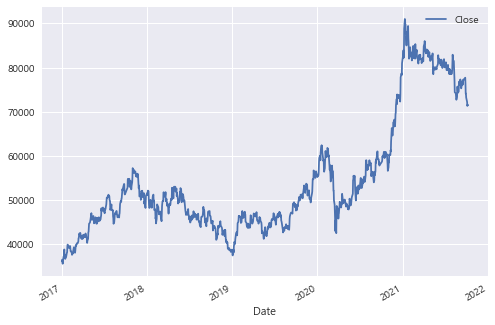

In [153]:
samsungDF.plot(y='Close')
plt.show()

In [154]:
samsungDF.loc['2017']   # samsungDF['2017']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,36240.0,35880.0,35980.0,36100.0,4650600.0,31618.542969
2017-01-03,36620.0,36020.0,36280.0,36480.0,7357650.0,31951.369141
2017-01-04,36520.0,36100.0,36500.0,36160.0,7971750.0,31671.093750
2017-01-05,36060.0,35540.0,36060.0,35560.0,10967450.0,31145.576172
2017-01-06,36440.0,36040.0,36180.0,36200.0,8880950.0,31706.121094
...,...,...,...,...,...,...
2017-12-21,51060.0,49100.0,51000.0,49140.0,15624300.0,43429.234375
2017-12-22,49960.0,49240.0,49400.0,49700.0,11199650.0,43924.148438
2017-12-26,50100.0,48200.0,49760.0,48200.0,16039850.0,42598.468750


In [155]:
samsungDF.loc['2017-01']
samsungDF.loc['2017':'2019']
samsungDF.loc['2017-02':'2017-08']
samsungDF.loc[:'2018']
samsungDF.index.year

Int64Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='Date', length=1164)

In [156]:
# samsungDF['year'] = samsungDF.index.year
# samsungDF.groupby('year').mean()
samsungDF.groupby( samsungDF.index.year ).mean()
samsungDF.groupby( [samsungDF.index.year, samsungDF.index.month] ).mean()

High           Low          Open         Close  \
Date Date                                                           
2017 1     37826.000000  37079.000000  37340.000000  37486.000000   
     2     38912.000000  38276.000000  38578.000000  38571.000000   
     3     41447.272727  40740.909091  40890.000000  41166.363636   
     4     42261.000000  41549.000000  41910.000000  41959.000000   
     5     46040.000000  45188.421053  45590.526316  45550.526316   
     6     46869.523810  46216.190476  46460.952381  46574.285714   
     7     49745.714286  48939.047619  49334.285714  49393.333333   
     8     47323.636364  46495.454545  47096.363636  46858.181818   
     9     50516.000000  49716.000000  50023.000000  50214.000000   
     10    54593.750000  53442.500000  53997.500000  53961.250000   
     11    56005.000000  54952.000000  55669.000000  55366.000000   
     12    51328.888889  50258.888889  50790.000000  50733.333333   
2018 1     50688.571429  49367.619048  50108.571429  49933.333333   
     2     48043.333333  46793.333333  47413.333333  47248.888889   
     3     50141.904762  49035.238095  49611.428571  49683.809524   
     4     50606.666667  49520.000000  50019.047619  50163.809524   
     5     51835.000000  50647.500000  51407.500000  51102.500000   
     6     48905.263158  47907.894737  48526.315789  48371.052632   
     7     46704.545455  45890.909091  46320.454545  46220.454545   
     8     46229.545455  45431.818182  45763.636364  45947.727273   
     9     46476.470588  45620.588235  46076.470588  46064.705882   
     10    44169.047619  43133.333333  43614.285714  43600.000000   
     11    43807.142857  42857.142857  43366.666667  43390.476190   
     12    40260.526316  39515.789474  39813.157895  39826.315789   
2019 1     41902.272727  40970.454545  41415.909091  41600.000000   
     2     46779.411765  45861.764706  46370.588235  46308.823529   
     3     45010.000000  44072.500000  44542.500000  44560.000000   
     4     46490.909091  45611.363636  46088.636364  46061.363636   
     5     43573.809524  42602.380952  43123.809524  43023.809524   
     6     45057.894737  44357.894737  44663.157895  44865.789474   
     7     46619.565217  45865.217391  46276.086957  46215.217391   
     8     44254.761905  43483.333333  43871.428571  43840.476190   
     9     47526.315789  46750.000000  47089.473684  47294.736842   
     10    50376.190476  49516.666667  49933.333333  49880.952381   
     11    52655.000000  51730.000000  52270.000000  52195.000000   
     12    53982.500000  53002.500000  53495.000000  53507.500000   
2020 1     59475.000000  58195.000000  58870.000000  58815.000000   
     2     59675.000000  58330.000000  58890.000000  59085.000000   
     3     51440.909091  49325.000000  50381.818182  50331.818182   
     4     49567.500000  48445.000000  49127.500000  49045.000000   
     5     49476.315789  48626.315789  49071.052632  49100.000000   
     6     53768.181818  52218.181818  52950.000000  52986.363636   
     7     55356.521739  54256.521739  54930.434783  54726.086957   
     8     57865.000000  56600.000000  57360.000000  56980.000000   
     9     58761.904762  57709.523810  58176.190476  58176.190476   
     10    60242.105263  59263.157895  59836.842105  59736.842105   
     11    64019.047619  62476.190476  63090.476190  63419.047619   
     12    74233.333333  72600.000000  73066.666667  73619.047619   
2021 1     88410.000000  85190.000000  86365.000000  86565.000000   
     2     84177.777778  82400.000000  83272.222222  83127.777778   
     3     82763.636364  81609.090909  82250.000000  82072.727273   
     4     84150.000000  83095.454545  83786.363636  83586.363636   
     5     81105.263158  80015.789474  80547.368421  80521.052632   
     6     81590.909091  80740.909091  81195.454545  81104.545455   
     7     79963.636364  79250.000000  79645.454545  79577.272727   
     8     77914.285714  76428.571429  77204.761905  77023.809524   
     9     76884.

In [157]:
# resample: 시계열데이터 집계전용 함수
# http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html
samsungDF.resample('Y').mean()
samsungDF.resample('M').mean()
samsungDF.resample('W').mean()
samsungDF.resample('W-MON').mean()
samsungDF.resample('Q').mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-31,39461.290323,38764.516129,38999.032258,39141.935484,1.164004e+07,34286.801159
2017-06-30,45070.666667,44335.000000,44668.333333,44711.666667,1.212670e+07,39296.938411
2017-09-30,49144.444444,48332.380952,48771.428571,48768.571429,1.100376e+07,42988.104663
2017-12-31,54028.148148,52940.370370,53547.407407,53405.555556,1.116375e+07,47213.846282
2018-03-31,49703.666667,48479.000000,49126.000000,49040.666667,1.534626e+07,43742.269206
2018-06-30,50477.333333,49385.333333,50009.166667,49909.000000,1.393414e+07,44842.191081
2018-09-30,46469.672131,45650.000000,46051.639344,46078.688525,9.944799e+06,41709.468430
2018-12-31,42827.049180,41911.475410,42345.081967,42352.459016,1.123298e+07,38626.030930
2019-03-31,44361.016949,43431.355932,43903.389831,43960.169492,1.220284e+07,40465.573623


In [158]:
# 이동 평균
df.columns = ['A','B']
df.rolling(window=2).mean()   
df.rolling(window=3).mean()
samsungDF.rolling(window=20).mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-10-01,76740.0,75655.0,76395.0,76150.0,14851836.60,76150.0
2021-10-05,76535.0,75430.0,76210.0,75920.0,15246793.90,75920.0
2021-10-06,76335.0,75205.0,76000.0,75685.0,15427267.70,75685.0


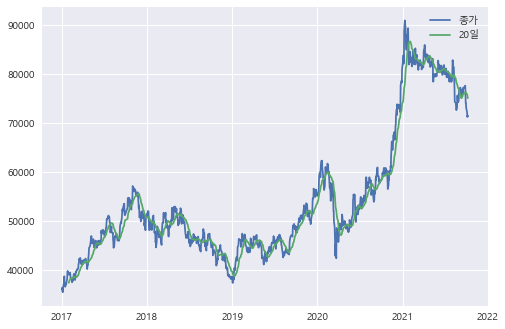

In [159]:
m20 = samsungDF.rolling(window=20).mean()['Close']
plt.plot(samsungDF.index, samsungDF['Close'])
plt.plot(samsungDF.index, m20)
plt.legend(['종가','20일'])
plt.show()

In [160]:
# 1. 2019년도 2월~ 10월 까지 개장가 종가 데이터를 출력하시요.
# 2. 2020년도 주별 집계현황을 구하시요.
# 3. 2020년 이후 년및 월별 집계현황을 구하시요.
# 4. 2021년도 분기별 집계현활을 구하시요
# 5. 2020년도 이동평균(window=10) 을 그래프로 그리시요

In [161]:
# 1. 2019년도 2월~ 10월 까지 개장가 종가 데이터를 출력하시요.

samsungDF.loc['2019-2':'2019-10',['Open','Close']]

,Open,Close
Date,,
2019-02-01,46650.0,46350.0
2019-02-07,46800.0,46200.0
2019-02-08,45700.0,44800.0
2019-02-11,44500.0,45000.0
2019-02-12,44650.0,46050.0
...,...,...
2019-10-25,50800.0,50900.0
2019-10-28,50700.0,51300.0
2019-10-29,51400.0,51100.0


In [162]:
# 2. 2020년도 주별 집계현황을 구하시요.

samsungDF.loc['2020'].resample('W').mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-05,56300.0,54950.000000,55750.0,55350.000000,14207741.50,52447.740234
2020-01-12,57540.0,56360.000000,56800.0,57240.000000,16778529.80,54238.637500
2020-01-19,60660.0,59580.000000,60100.0,60200.000000,14594759.40,57043.431250
2020-01-26,62400.0,61000.000000,61575.0,61725.000000,13481917.00,58488.468750
2020-02-02,59075.0,57575.000000,58775.0,57875.000000,20170509.75,54840.339844
2020-02-09,59780.0,58060.000000,58760.0,59420.000000,19240653.80,56304.330469
2020-02-16,60940.0,59840.000000,60280.0,60520.000000,13761680.20,57346.653125
2020-02-23,60880.0,59680.000000,60340.0,60140.000000,13347135.00,56986.577344
2020-03-01,57100.0,55740.000000,56180.0,56260.000000,25651963.00,53310.023438


In [163]:
# 3. 2020년 이후 년및 월별 집계현황을 구하시요.

samsungDF['2020':].groupby([samsungDF.loc['2020':].index.year,
                            samsungDF.loc['2020':].index.month]).mean()

High           Low          Open         Close  \
Date Date                                                           
2020 1     59475.000000  58195.000000  58870.000000  58815.000000   
     2     59675.000000  58330.000000  58890.000000  59085.000000   
     3     51440.909091  49325.000000  50381.818182  50331.818182   
     4     49567.500000  48445.000000  49127.500000  49045.000000   
     5     49476.315789  48626.315789  49071.052632  49100.000000   
     6     53768.181818  52218.181818  52950.000000  52986.363636   
     7     55356.521739  54256.521739  54930.434783  54726.086957   
     8     57865.000000  56600.000000  57360.000000  56980.000000   
     9     58761.904762  57709.523810  58176.190476  58176.190476   
     10    60242.105263  59263.157895  59836.842105  59736.842105   
     11    64019.047619  62476.190476  63090.476190  63419.047619   
     12    74233.333333  72600.000000  73066.666667  73619.047619   
2021 1     88410.000000  85190.000000  86365.000000  86565.000000   
     2     84177.777778  82400.000000  83272.222222  83127.777778   
     3     82763.636364  81609.090909  82250.000000  82072.727273   
     4     84150.000000  83095.454545  83786.363636  83586.363636   
     5     81105.263158  80015.789474  80547.368421  80521.052632   
     6     81590.909091  80740.909091  81195.454545  81104.545455   
     7     79963.636364  79250.000000  79645.454545  79577.272727   
     8     77914.285714  76428.571429  77204.761905  77023.809524   
     9     76884.210526  75800.000000  76526.315789  76305.263158   
     10    72860.000000  71660.000000  72680.000000  71960.000000   

                 Volume     Adj Close  
Date Date                              
2020 1     1.599458e+07  55731.052930  
     2     1.800036e+07  55986.896094  
     3     3.537865e+07  47723.085405  
     4     2.120510e+07  46816.465430  
     5     1.969814e+07  46868.968133  
     6     2.351997e+07  50609.257990  
     7     1.901368e+07  52588.686821  
     8     2.008490e+07  54754.570508  
     9     2.030011e+07  55936.808036  
     10    1.723988e+07  57756.865954  
     11    2.363959e+07  61317.024554  
     12    2.523804e+07  71363.527158  
2021 1     3.827356e+07  85802.157422  
     2     2.405296e+07  82395.224826  
     3     1.761874e+07  81382.226562  
     4     1.695174e+07  83217.930398  
     5     1.853742e+07  80166.129934  
     6     1.514088e+07  80779.448509  
     7     1.254028e+07  79577.272727  
     8     2.380298e+07  77023.809524  
     9     1.480175e+07  76305.263158  
     10    1.730022e+07  71960.000000

In [164]:
# 4. 2021년도 분기별 집계현활을 구하시요

samsungDF.loc['2021'].resample('Q').mean()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-31,85070.000000,83040.000000,83928.333333,83886.666667,2.643395e+07,83159.436328
2021-06-30,82338.095238,81344.444444,81904.761905,81795.238095,1.679760e+07,81446.012773
2021-09-30,78325.806452,77237.096774,77862.903226,77709.677419,1.704810e+07,77709.677419
2021-12-31,72860.000000,71660.000000,72680.000000,71960.000000,1.730022e+07,71960.000000


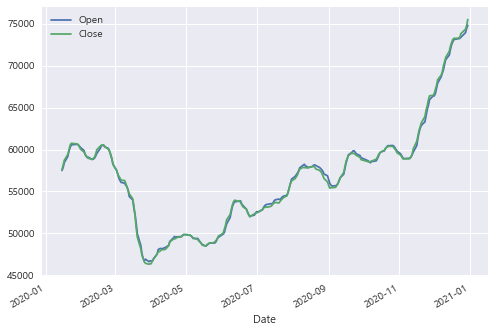

In [165]:
# 5. 2020년도 이동평균(window=10) 을 그래프로 그리시요

samsungDF.loc['2020'].rolling(window=10).mean().plot(y=['Open','Close'])
plt.show()